# **Predictive Modeling of Melbourne Housing Prices Using Machine Learning Techniques**

This term project explores the development and evaluation of predictive models for estimating housing prices in Melbourne using supervised machine learning techniques. The primary objective is to construct regression models that can accurately forecast property values based on selected features from the dataset. To achieve this, we employ three widely used regression algorithms: Linear Regression, Decision Tree Regressor, and Random Forest Regressor.

**Project Workflow:**



1.   **Data Loading and Preprocessing:** The dataset is imported and examined for missing values. Necessary preprocessing steps are applied to ensure data integrity and suitability for modeling.
2.   **Feature Selection:** Relevant numerical features are selected based on domain knowledge and exploratory data analysis to serve as predictors in the regression models.
3.  **Data Splitting:** The dataset is partitioned into training and validation sets using a randomized train-test split approach to enable unbiased model evaluation.
4.  **Model Development and Evaluation:** Three models — Linear Regression, Decision Tree Regressor, and Random Forest Regressor — are trained on the selected features. Their performance is evaluated using the Mean Absolute Error (MAE) metric, which quantifies the average prediction error.
5.  **Comparative Analysis:** The models are compared based on their MAE scores to identify the most effective approach. Insights into model performance are discussed, and the advantages and limitations of each method are considered.

This project aims to demonstrate practical applications of regression algorithms in real-world data scenarios, emphasizing the trade-offs between model complexity, interpretability, and predictive performance.
This notebook demonstrates how to build and evaluate a machine learning model to predict housing prices in Melbourne. We will use a Decision Tree Regressor and a Random Forest Regressor to predictive housing price.

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# Set the style for the plots
sns.set_style("whitegrid")

In [ ]:
melbourne_file_path = 'melb_data.csv'

# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path)
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# **Interpreting Data Description:**

The results show 8 numbers for each column in your original dataset. The first number, the count, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house. We'll come back to the topic of missing data.

The second value is the mean, which is the average. Under that, std is the standard deviation, which measures how numerically spread out the values are.

To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

In [ ]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# **Dataset Columns:**

The dataset contains various attributes for houses in Melbourne. The code melbourne_data.columns would reveal the full list of these columns, providing a comprehensive view of the available features for analysis.

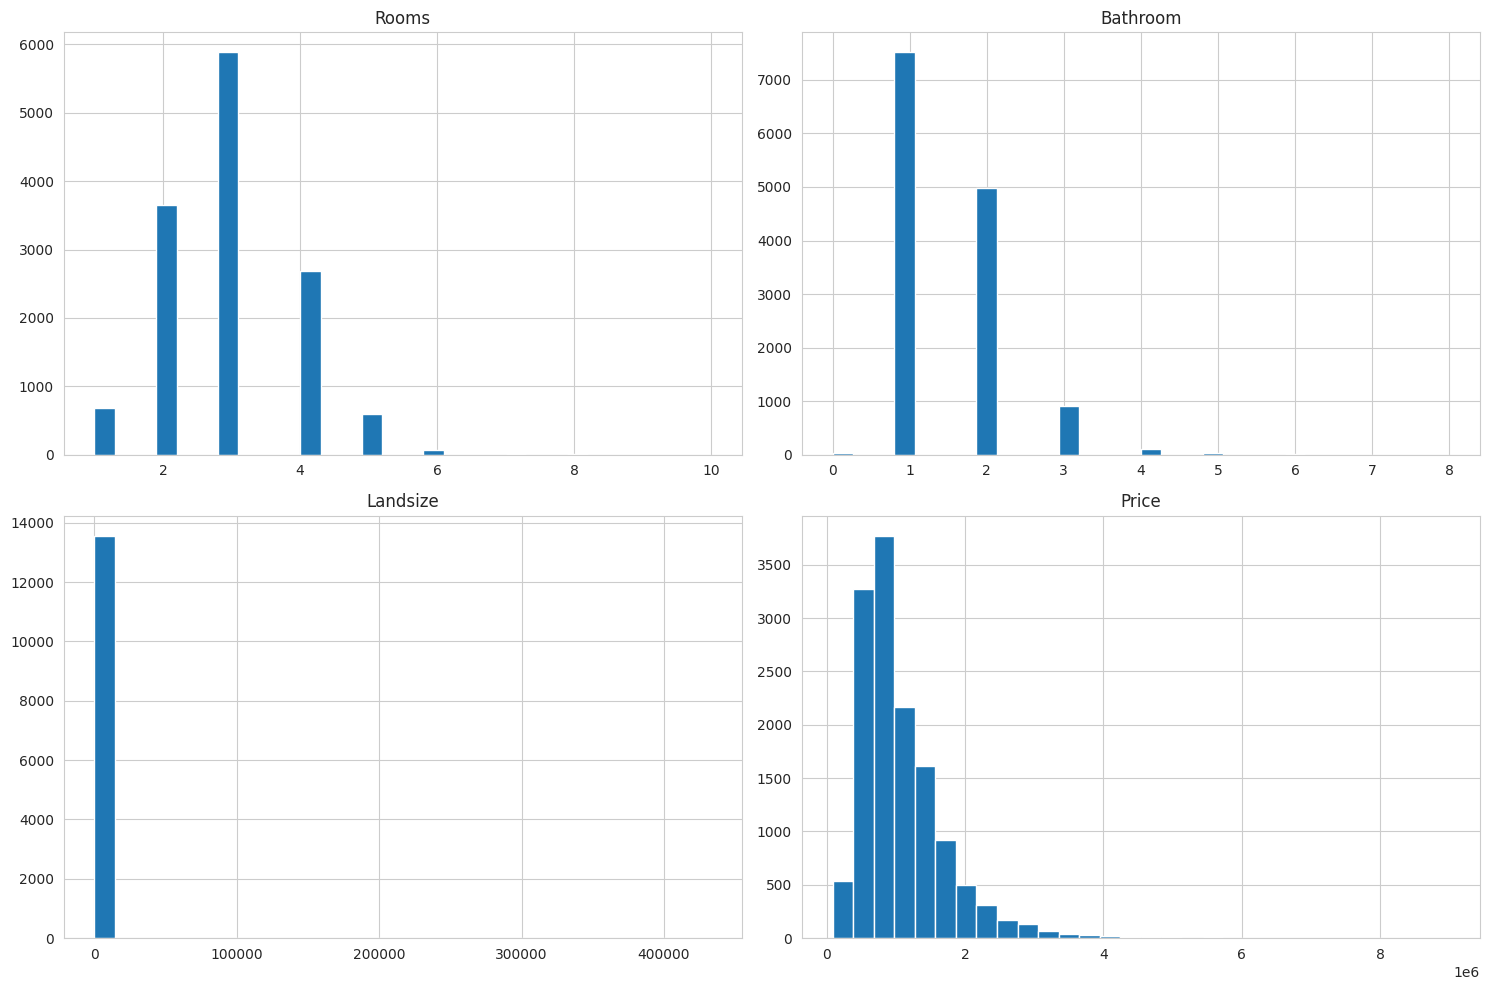

In [ ]:
numerical_features = ['Rooms', 'Bathroom', 'Landsize', 'Price']
melbourne_data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# **Histogram:**
These histograms provide a visual summary of the distribution of values for the number of rooms, bathrooms, land size, and price in the Melbourne housing dataset. By examining the shape of the histograms, you can gain insights into the typical values, ranges, and potential skewness of these features.

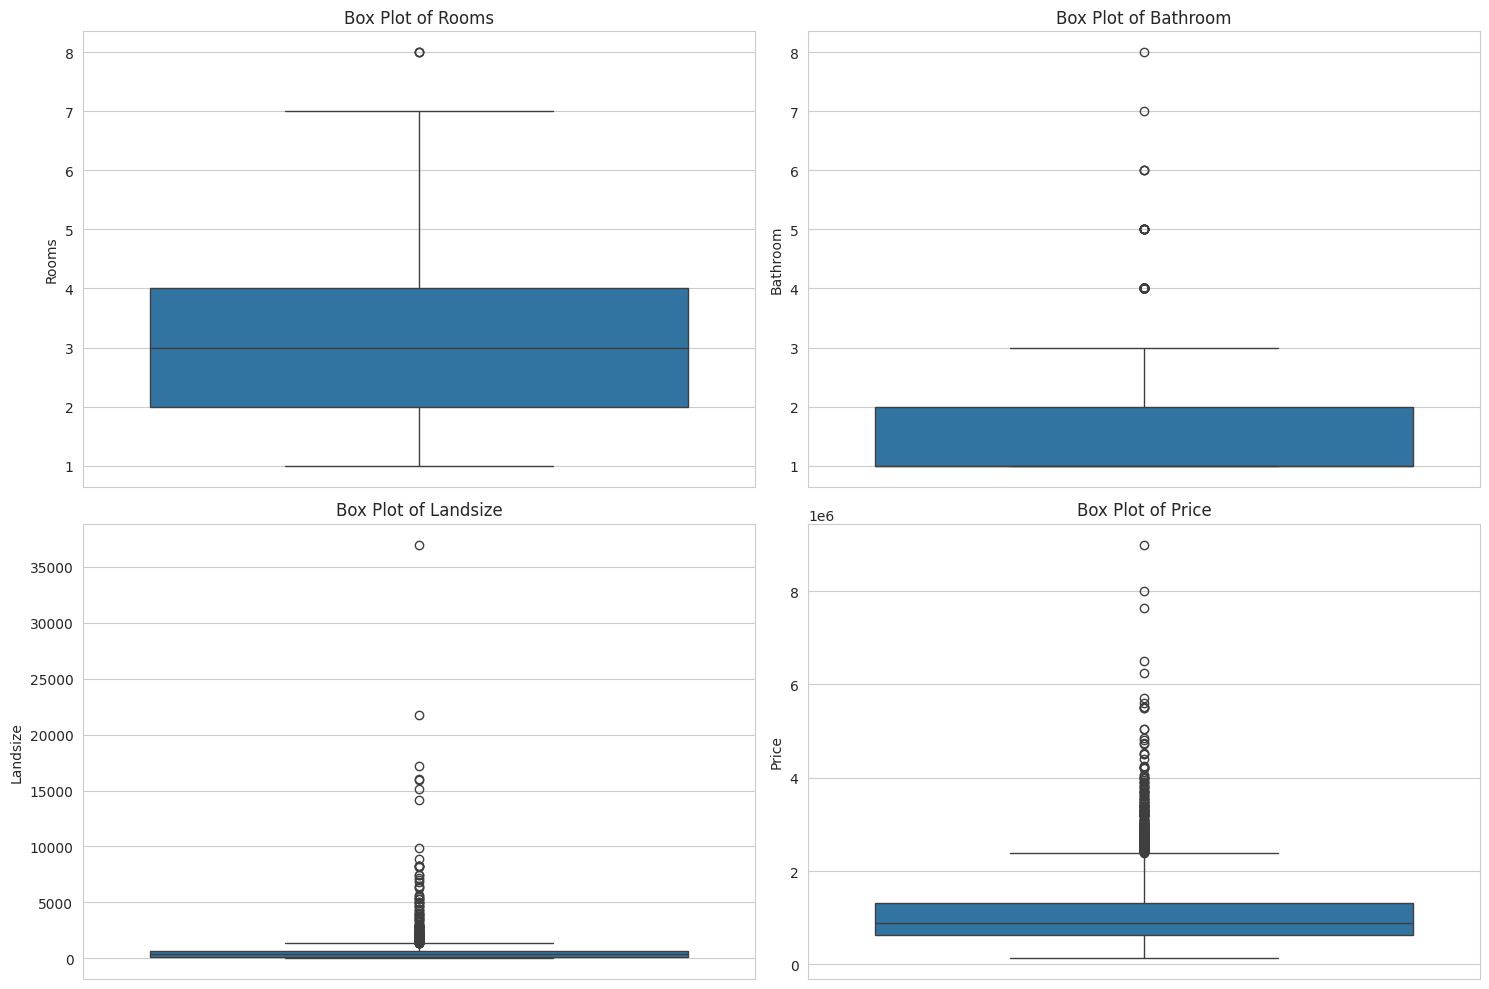

In [ ]:
numerical_features = ['Rooms', 'Bathroom', 'Landsize', 'Price'] # Redefining for clarity in this block
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=melbourne_data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# **Box Plots:**
Box plots help visualize the distribution, median, quartiles, and potential outliers for numerical features.

Here, generating box plots for features like 'Rooms', 'Bathroom', 'Landsize', and 'Price' helps in understanding the characteristics of the housing data. This understanding can inform decisions about data preprocessing, feature selection, and model choice.

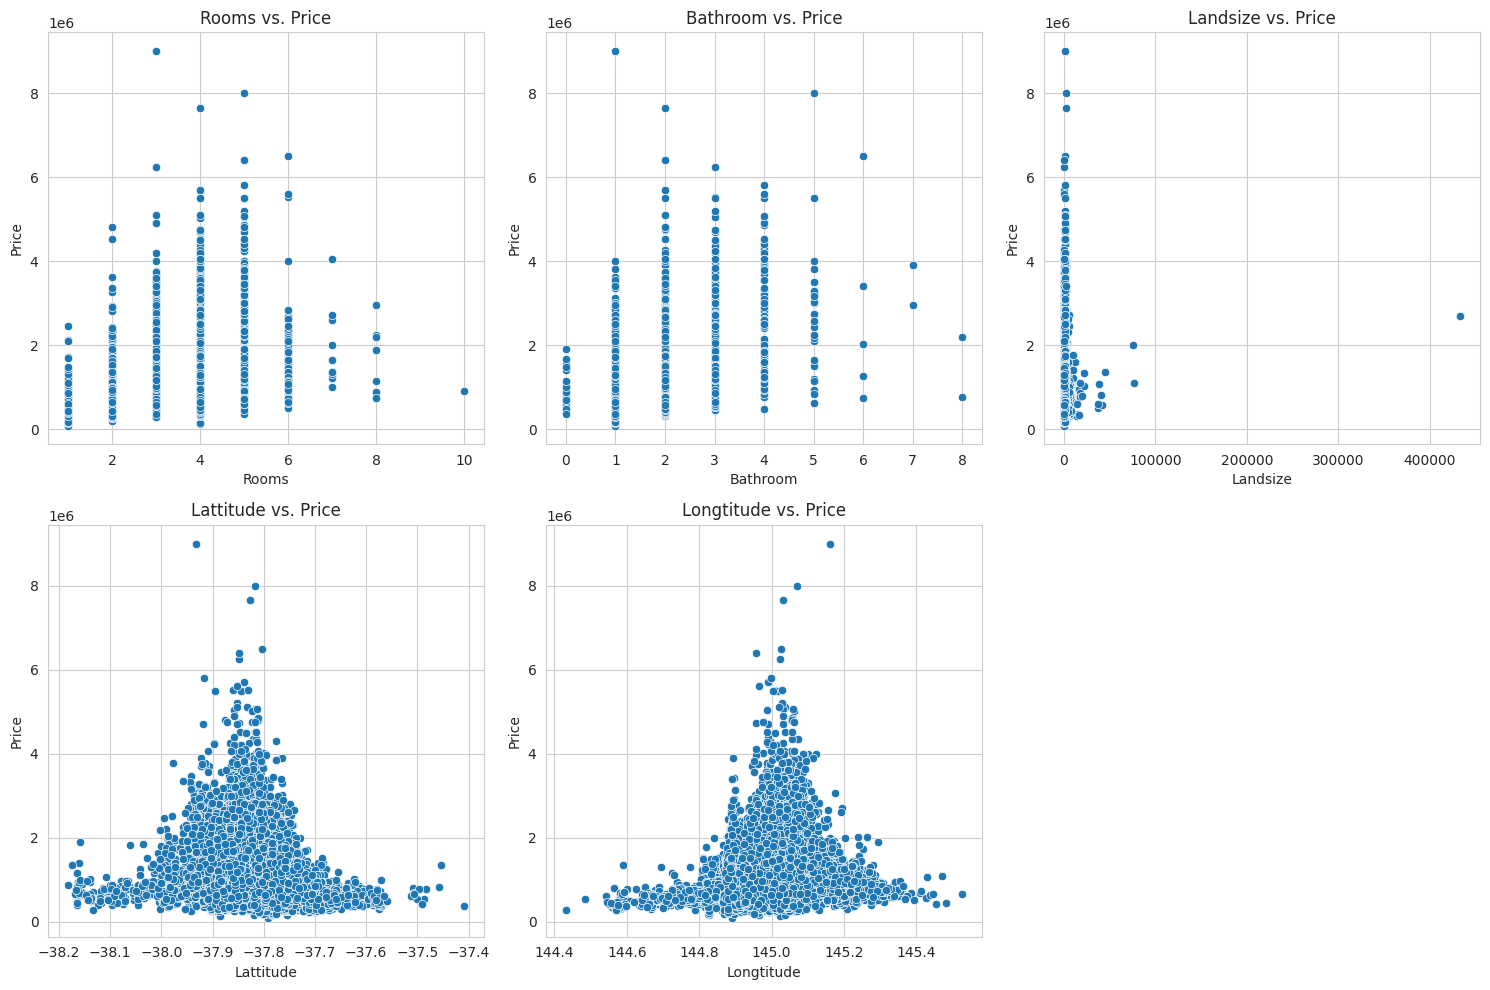

In [ ]:
features_for_scatter = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_scatter):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=melbourne_data[feature], y=melbourne_data['Price'])
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

# **Scatter Plots:**
These scatter plots illustrate the relationship between selected features and the target variable, 'Price' which is essential for making informed decisions during the model building process.

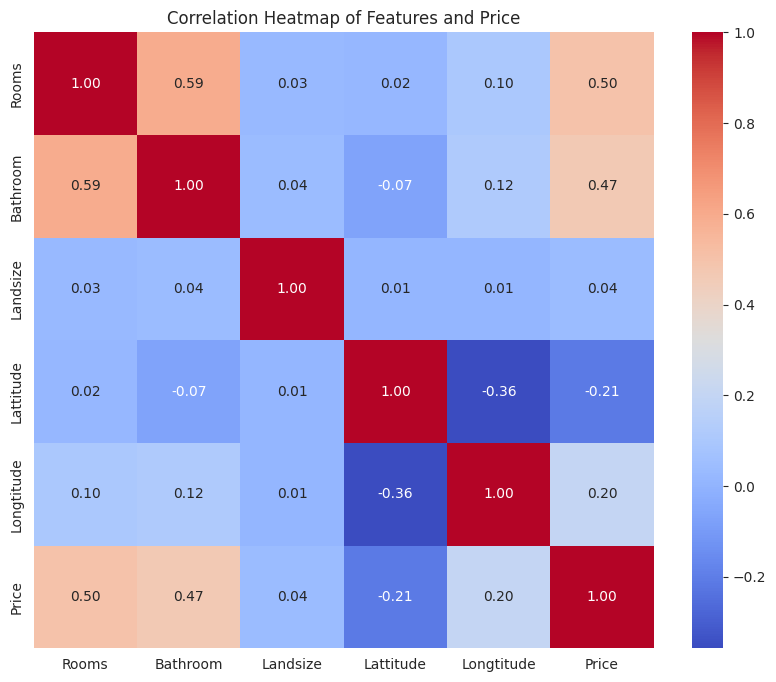

In [ ]:
features_for_heatmap = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Price']
correlation_data = melbourne_data[features_for_heatmap]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features and Price')
plt.show()

# **Correlation Heatmap:**
The heatmap visualizes the pairwise correlation coefficients between the selected features and the target variable, 'Price'. It is used to gain a quick and intuitive understanding of the linear relationships between the chosen features and the house price, which aids in the process of building and interpreting the machine learning models later in the notebook.

In [ ]:
melbourne_data = melbourne_data.dropna(axis=0)

# Handling Missing Values:
Describe the process you used to handle missing data in your dataset. In your code, you used melbourne_data = melbourne_data.dropna(axis=0). Explain that you removed rows with missing values.

In [ ]:
y = melbourne_data.Price

# **Target Variable (y):**

The variable y is defined as melbourne_data.Price. This represents the target variable for our machine learning models. The goal of this project is to predict the house price based on the available features.

In [ ]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

# **Features (X):**

The variable X is defined using a selected subset of the dataset's columns: melbourne_data[melbourne_features]. The chosen features, as specified in melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude'], are the independent variables used to train the predictive models. These features are hypothesized to have a significant influence on the house price.

In [ ]:
X = melbourne_data[melbourne_features]

In [ ]:
X.describe()


,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


# **Interpretation of Feature (X):**
To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

In [ ]:
X.head()


,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [ ]:

from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)

    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# **Decision Tree Regressor:**

Initially, a Decision Tree Regressor model was utilized. Th
is model was explored with varying max_leaf_nodes to understand the impact of tree complexity on predictive performance. The code iterates through different values for max_leaf_nodes and calculates the Mean Absolute Error (MAE) for each configuration. The MAE was chosen as the evaluation metric, providing a clear indication of the average difference between the predicted and actual house prices.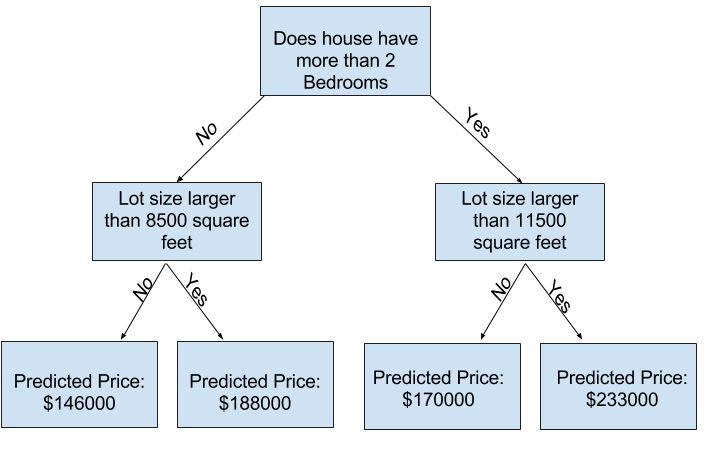

In [ ]:
# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

# **Splitting Data:**
Describe how you divided your data into training and validation sets. In your code, you used train_test_split. Explain that you split X and y into train_X, val_X, train_y, and val_y to prepare the data for model training and evaluation. Mention that a random_state was used for reproducibility.

In [ ]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271320


These results indicate that a max_leaf_nodes value around 500 yielded the lowest Mean Absolute Error on the validation set for the Decision Tree model.

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191669.7536453626


To potentially improve upon the Decision Tree's performance, a Random Forest Regressor model was also trained. This ensemble method builds multiple decision trees and averages their predictions, which can often lead to more robust and accurate results. The Random Forest model was trained on the training data, and predictions were made on the validation set.

In [ ]:
# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(train_X, train_y)

# Make predictions on the validation data
linear_preds = linear_model.predict(val_X)

# Calculate the Mean Absolute Error
linear_mae = mean_absolute_error(val_y, linear_preds)

print(f"Mean Absolute Error for Linear Regression: {linear_mae}")

Mean Absolute Error for Linear Regression: 301277.67455197725


# **Linear Regression Model:**
As a baseline, we will also train a Linear Regression model to predict house prices. Linear Regression is a simpler model that assumes a linear relationship between the features and the target variable.

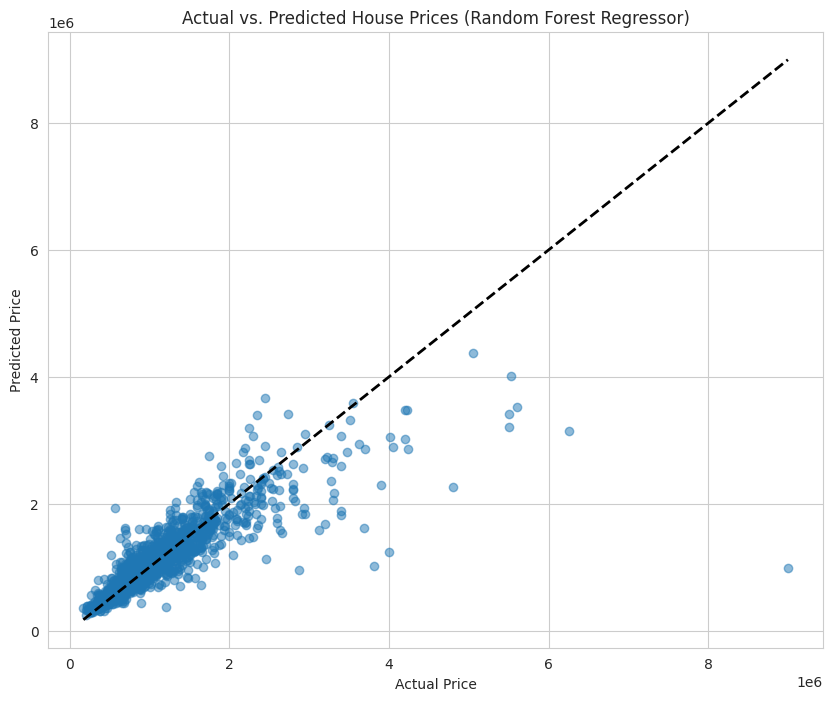

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(val_y, melb_preds, alpha=0.5)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=2) # Add a diagonal line for reference
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices (Random Forest Regressor)')
plt.grid(True)
plt.show()

# **Scatter Plot of Actual Vs Predicted (Random Forest Refressor):**
This scatter plot visualizes the relationship between the actual house prices and the prices predicted by the Random Forest Regressor model on the validation dataset. A perfect model would show all points lying on a diagonal line where Actual Price equals Predicted Price. Points that are close to the diagonal line indicate predictions that are close to the true values. The spread of the points around the line gives an idea of the model's error.



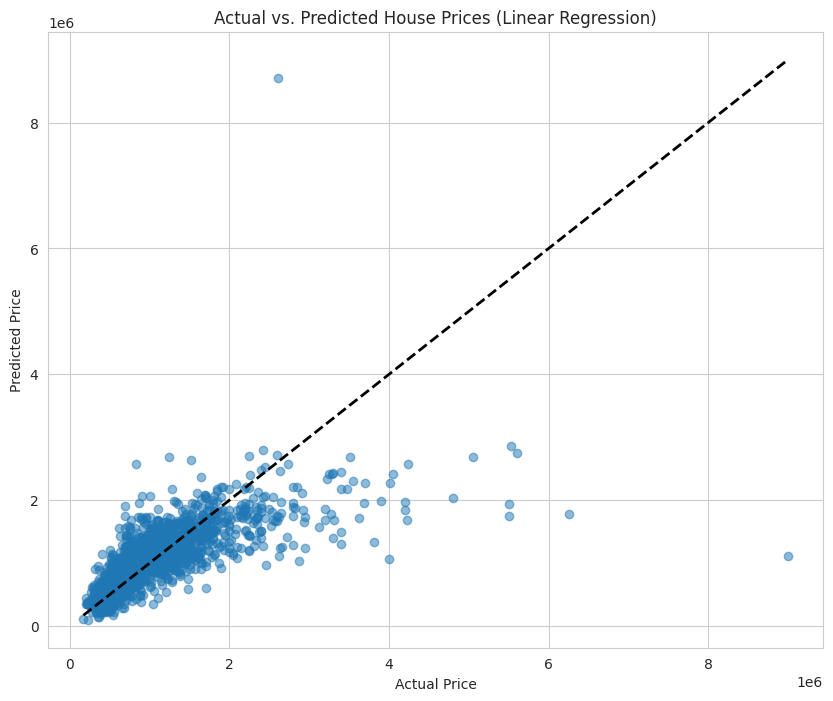

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(val_y, linear_preds, alpha=0.5)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'k--', lw=2) # Add a diagonal line for reference
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices (Linear Regression)')
plt.grid(True)
plt.show()

# **Scatter of Actual Vs Predicted (Linear Regression):**
The scatter plot illustrates the performance of the Linear Regression model by comparing the actual house prices to the prices predicted by the model on the validation dataset. Each point on the plot represents a single house, with its horizontal position indicating the true price and its vertical position representing the model's prediction. Ideally, in a perfect prediction scenario, all points would fall directly on the dashed diagonal line, signifying that the predicted price exactly matches the actual price. The extent to which the points deviate from this line provides a visual assessment of the model's accuracy. A tighter clustering of points around the diagonal suggests more precise predictions and lower error, while a wider spread indicates greater prediction errors. This visualization helps in understanding the overall effectiveness of the Linear Regression model for this dataset and can highlight any systematic biases or areas where the model's predictions are consistently off.

# **Conclusion:**

This project successfully explored the application of supervised machine learning techniques for predicting Melbourne housing prices. Our primary objective was to develop and evaluate regression models using Linear Regression, Decision Tree Regressor, and Random Forest Regressor.

After loading and preprocessing the dataset, including handling missing values by dropping rows, we selected a subset of numerical features such as 'Rooms', 'Bathroom', 'Landsize', 'Lattitude', and 'Longtitude' based on their potential relevance to housing prices, which was further supported by our exploratory data analysis through visualizations like histograms, box plots, scatter plots, and a correlation heatmap. The data was then split into training and validation sets to ensure an unbiased evaluation of our models.

We developed and evaluated the three chosen regression models based on the Mean Absolute Error (MAE).

•	**Linear Regression**: MAE = 301,278

•	**Decision Tree Regressor:**

o	Max leaf nodes: 5 → MAE = 385,696

o	Max leaf nodes: 50 → MAE = 279,794

o	Max leaf nodes: 500 → MAE = 261,718

o	Max leaf nodes: 5000 → MAE = 271,320

•	**Random Forest Regressor:** MAE = 191,670


This comparative analysis revealed that the **Random Forest Regressor** performed best, achieving the lowest average prediction error **(MAE = 191,670)**. This is expected, as Random Forests combine multiple decision trees to reduce overfitting and improve generalization, which often leads to better performance compared to a single decision tree or a linear model.
While the models provided valuable insights into the factors influencing housing prices, certain limitations should be acknowledged. The handling of missing data by dropping rows may have reduced the dataset’s richness. Additionally, the limited number of features used might have excluded other important predictors like property type, suburb, or building area. There is also potential for model underfitting or overfitting, especially with the Decision Tree Regressor at low or very high leaf node counts.


**Future work could involve:**

*   Incorporating a broader set of features
*   Applying advanced preprocessing techniques (e.g., imputation, feature scaling)
*   Exploring more complex models like Gradient Boosting or XGBoost
*   Performing hyperparameter tuning for all models using techniques such as grid search or randomized search
*   Validating model performance using cross-validation

In conclusion, this project demonstrates the practical application of various regression algorithms in a real-world dataset and highlights the importance of data preprocessing, feature selection, and model evaluation in building effective predictive models for complex problems like housing price forecasting.